In [17]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /Users/sainivasgandham/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /Users/sainivasgandham/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /Users/sainivasgandham/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /Users/sainivasgandham/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /Users/sainivasgandham/nltk_data...
[nltk_data]    |   Package averaged_perce

True

In [19]:
pip install -U textblob

Note: you may need to restart the kernel to use updated packages.


In [20]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re
from textblob import TextBlob

df = pd.read_csv("Documents/ML/emails.csv")


#print(df)
df['has_hyperlinks'] = df['text'].apply(lambda x : 1 if 'https' in x or 'www' in x else 0)
df['char_count'] = df['text'].apply(len)
df['word_count'] = df['text'].apply(lambda x : len(x.split()))
df['exclaimation_count'] = df['text'].apply(lambda x : x.count('!'))
df['capitalized_words'] = df['text'].apply(lambda x: sum(1 for word in x.split() if word.isupper()))
suspicious_greetings = ['dear friend','hello winner','dear customer', 'dear user']
df['suspicious_greeting'] = df['text'].apply(lambda x : 1 if any(greeting in x.lower() for greeting in suspicious_greetings) else 0)
df['sentiment_polarity'] = df['text'].apply(lambda x : TextBlob(x).sentiment.polarity)
additional_features = df[['has_hyperlinks','char_count','word_count','exclaimation_count','capitalized_words','suspicious_greeting','sentiment_polarity']].values
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\W', ' ', text)  # Corrected raw string usage
    tokens = text.split()
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Apply preprocessing function correctly
df['processed_text'] = df['text'].apply(preprocess_text)
print(df['processed_text'])

0       subject naturally irresistible corporate ident...
1       subject stock trading gunslinger fanny merrill...
2       subject unbelievable new homes made easy im wa...
3       subject 4 color printing special request addit...
4       subject money get software cds software compat...
                              ...                        
5723    subject research development charges gpg forwa...
5724    subject receipts visit jim thanks invitation v...
5725    subject enron case study update wow day super ...
5726    subject interest david please call shirley cre...
5727    subject news aurora 5 2 update aurora version ...
Name: processed_text, Length: 5728, dtype: object


In [36]:
import numpy as np
import pandas as pd
from collections import Counter
import math

max_features = 500

# Tokenize and count term frequencies in the corpus
all_tokens = [word for doc in df['processed_text'] for word in doc.split()]
vocab_counts = Counter(all_tokens)
vocab = [term for term, _ in vocab_counts.most_common(max_features)]  # Limit to top terms
vocab_index = {term: idx for idx, term in enumerate(vocab)}  # Term to index mapping

# Calculate Term Frequency (TF)
def compute_tf(doc, vocab_index):
    """Compute term frequency for a single document."""
    term_counts = Counter(doc.split())
    tf = np.zeros(len(vocab_index))
    for term, count in term_counts.items():
        if term in vocab_index:
            tf[vocab_index[term]] = count  # Raw frequency
    return tf

tf_matrix = np.array([compute_tf(doc, vocab_index) for doc in df['processed_text']])

# Calculate Document Frequency (DF)
df_counts = np.sum(tf_matrix > 0, axis=0)  # Count non-zero occurrences per term

# Calculate Inverse Document Frequency (IDF)
N = len(df['processed_text'])  # Total number of documents
idf = np.log((N + 1) / (df_counts + 1)) + 1  # Smoothing

# Create TF-IDF Matrix
tf_idf_matrix = tf_matrix * idf  # Broadcasting multiplies TF matrix by IDF vector

# Normalize TF-IDF values (optional but recommended)
tf_idf_norm = np.linalg.norm(tf_idf_matrix, axis=1, keepdims=True)
tf_idf_matrix = tf_idf_matrix / (tf_idf_norm + 1e-10)  # Normalize each row to unit length

additional_features = df[['has_hyperlinks', 'char_count', 'word_count',
                          'exclaimation_count', 'capitalized_words',
                          'suspicious_greeting', 'sentiment_polarity']].values

X_additional_f = np.hstack((tf_idf_matrix, additional_features))

feature_names = vocab
additional_feature_names = ['has_hyperlinks', 'char_count', 'word_count',
                            'exclaimation_count', 'capitalized_words',
                            'suspicious_greeting', 'sentiment_polarity']
all_features = feature_names + additional_feature_names

print("Features:")
print(all_features)

print(len(X_additional_f))


Features:
['_', 'enron', 'ect', 'subject', 'vince', 'hou', 'com', 'please', '2000', 'kaminski', 'would', 'cc', 'j', '1', 'pm', '2001', '2', 'time', 'research', '10', 'thanks', 'know', 'may', '3', 'group', 'information', 'new', 'e', 'energy', 'like', 'risk', 'one', 'business', 'get', 'power', '00', 'email', 'let', 'us', 'also', '0', 'message', '5', 'mail', 'need', 'meeting', '11', '01', '30', 'corp', 'company', 'shirley', '4', 'edu', '12', 'http', 'houston', 'forward', 'management', 'market', 'work', '04', 'forwarded', 'make', 'see', 'could', 'call', 'th', 'price', 'www', 'model', '02', '03', 'regards', 'best', 'contact', 'year', 'week', '08', 'day', 'development', 'conference', 'help', '8', 'next', 'look', 'program', 'free', 'thank', 'sent', 'crenshaw', '09', 'send', '713', 'use', 'communications', 'well', 'project', 'good', 'gas', '05', 'list', '20', 'stinson', 'john', 'want', 'think', '000', 'university', '7', 'finance', 'fax', 'available', '15', 'take', '6', 'following', 'phone', 'l

In [22]:
from collections import Counter
import numpy as np

class KNNClassifier_Naive:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = np.array(X_train)
        self.y_train = np.array(y_train)

    def predict(self, X_test):
        # Sequentially predict the label for each test instance
        return [self._predict(x) for x in X_test]

    def _predict(self, x):
        # Calculate distances from the test instance to all training instances
        distances = np.linalg.norm(self.X_train - x, axis=1)

        # Get the indices of the k nearest neighbors
        k_indices = np.argpartition(distances, self.k)[:self.k]

        # Retrieve the labels of the k nearest neighbors
        nearest_labels = self.y_train[k_indices]

        # Majority vote to determine the predicted label
        most_common = Counter(nearest_labels).most_common(1)
        return most_common[0][0]


In [23]:
import numpy as np

def chi_square_feature_selection(X, y, top_n):
    """Selects top_n features based on Chi-square score."""
    chi_scores = []
    n_samples, n_features = X.shape

    for i in range(n_features):
        observed_counts = np.zeros((2, len(np.unique(y))))  # 2 classes (spam, non-spam)

        # Count observed frequencies of the feature across classes
        for label in np.unique(y):
            observed_counts[1, label] = np.sum((X[:, i] > 0) & (y == label))  # Feature present in class
            observed_counts[0, label] = np.sum((X[:, i] == 0) & (y == label)) # Feature absent in class

        # Expected frequencies based on class distribution
        row_sums = np.sum(observed_counts, axis=1)
        col_sums = np.sum(observed_counts, axis=0)
        total = np.sum(observed_counts)
        expected_counts = np.outer(row_sums, col_sums) / total

        # Calculate Chi-square statistic
        chi_square_stat = np.sum((observed_counts - expected_counts) ** 2 / (expected_counts + 1e-5))  # Avoid zero-division
        chi_scores.append((i, chi_square_stat))

    # Sort features by Chi-square score in descending order and select top_n features
    chi_scores.sort(key=lambda x: x[1], reverse=True)
    selected_indices = [index for index, score in chi_scores[:top_n]]

    return X[:, selected_indices], selected_indices  # Return reduced X and selected feature indices

def calculate_pca_components(X, variance_threshold=0.95):
    """Reduces dimensionality of X using PCA based on variance threshold."""
    # Center the data
    X_centered = X - np.mean(X, axis=0)

    # Compute the covariance matrix
    covariance_matrix = np.cov(X_centered, rowvar=False)

    # Perform eigen decomposition
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

    # Sort eigenvalues and eigenvectors by descending eigenvalues
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_indices]

    # Calculate cumulative explained variance
    cumulative_variance = np.cumsum(sorted_eigenvalues) / np.sum(sorted_eigenvalues)

    # Find the number of components needed to reach the variance threshold
    n_components = np.searchsorted(cumulative_variance, variance_threshold) + 1
    selected_eigenvectors = eigenvectors[:, sorted_indices[:n_components]]

    # Project data onto the selected components
    X_pca = np.dot(X_centered, selected_eigenvectors)
    return X_pca, selected_eigenvectors, n_components



In [69]:
import numpy as np
import heapq
from collections import Counter
from joblib import Parallel, delayed

class CustomKDTreeNode:
    """Node in the k-d tree."""
    def __init__(self, point=None, label=None, left=None, right=None, bounds=None):
        self.point = point          # Coordinate of the split
        self.label = label          # Label of the split point
        self.left = left            # Left subtree
        self.right = right          # Right subtree
        self.bounds = bounds        # Bounding box for pruning
        self.is_leaf = False        # Is this node a leaf?
        self.data = None            # For leaf nodes, store data directly

class CustomKDTree:
    """Optimized k-d Tree for efficient nearest-neighbor search."""
    def __init__(self, data, labels, leaf_size=40, metric="euclidean"):
        self.leaf_size = leaf_size
        self.metric = metric
        self.root = self.build_tree(data, labels)

    def build_tree(self, data, labels, depth=0):
        n_samples, n_features = data.shape

        # Stop recursion when leaf_size is reached
        if n_samples <= self.leaf_size:
            leaf = CustomKDTreeNode()
            leaf.is_leaf = True
            leaf.data = (data, labels)
            return leaf

        axis = depth % n_features
        sorted_indices = np.argsort(data[:, axis])
        median_idx = len(data) // 2

        # Calculate bounding box for the current node
        bounds = np.zeros((2, n_features))
        bounds[0, :] = np.min(data, axis=0)
        bounds[1, :] = np.max(data, axis=0)

        return CustomKDTreeNode(
            point=data[sorted_indices[median_idx]],
            label=labels[sorted_indices[median_idx]],
            left=self.build_tree(data[sorted_indices[:median_idx]], labels[sorted_indices[:median_idx]], depth + 1),
            right=self.build_tree(data[sorted_indices[median_idx + 1:]], labels[sorted_indices[median_idx + 1:]], depth + 1),
            bounds=bounds
        )

    def knn_query(self, query_point, k):
        """Find the k-nearest neighbors to the query_point."""
        neighbors = []
        self._knn_search(self.root, query_point, k, 0, neighbors)
        return [label for _, label in neighbors]

    def _knn_search(self, node, query_point, k, depth, neighbors):
        if node is None:
            return

        if node.is_leaf:
            data, labels = node.data
            for i, point in enumerate(data):
                dist = self._compute_distance(query_point, point)
                if len(neighbors) < k:
                    heapq.heappush(neighbors, (-dist, labels[i]))
                elif dist < -neighbors[0][0]:
                    heapq.heappushpop(neighbors, (-dist, labels[i]))
            return

        # Compute distance to splitting plane
        axis = depth % len(query_point)
        diff = query_point[axis] - node.point[axis]

        # Explore closer branch first
        closer_branch, farther_branch = (
            (node.left, node.right) if diff < 0 else (node.right, node.left)
        )
        self._knn_search(closer_branch, query_point, k, depth + 1, neighbors)

        # Check whether the farther branch needs to be explored
        if len(neighbors) < k or abs(diff) < -neighbors[0][0]:
            self._knn_search(farther_branch, query_point, k, depth + 1, neighbors)

    def _compute_distance(self, p1, p2):
        """Compute the distance based on the specified metric."""
        if self.metric == "euclidean":
            return np.linalg.norm(p1 - p2)
        elif self.metric == "manhattan":
            return np.sum(np.abs(p1 - p2))
        elif self.metric == "chebyshev":
            return np.max(np.abs(p1 - p2))
        else:
            raise ValueError(f"Unsupported metric: {self.metric}")

class KNNWithCustomKDTree:
    """K-Nearest Neighbors using an optimized k-d Tree for efficient search."""
    def __init__(self, k=3, leaf_size=40, metric="euclidean", n_jobs=2):
        self.k = k
        self.leaf_size = leaf_size
        self.metric = metric
        self.n_jobs = n_jobs

    def fit(self, X_train, y_train):
        self.tree = CustomKDTree(X_train, y_train, leaf_size=self.leaf_size, metric=self.metric)

    def predict(self, X_test):
        if self.n_jobs == 1:
            return [self._predict(x) for x in X_test]
        else:
            return Parallel(n_jobs=self.n_jobs)(delayed(self._predict)(x) for x in X_test)

    def _predict(self, x):
        nearest_neighbors = self.tree.knn_query(x, self.k)
        most_common = Counter(nearest_neighbors).most_common(1)
        return most_common[0][0]


In [99]:
def train_test_split(X, y, test_size=0.2, random_state=None):
    if random_state is not None:
        np.random.seed(random_state)  # Set random seed for reproducibility

    # Shuffle indices
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)

    # Calculate split index
    test_count = int(len(indices) * test_size)

    # Split indices for training and testing
    test_indices = indices[:test_count]
    train_indices = indices[test_count:]

    # Split the data into training and test sets
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    return X_train, X_test, y_train, y_test

def accuracy_score(y_true, y_pred):
    correct_predictions = np.sum(y_true == y_pred)
    total_predictions = len(y_true)
    accuracy = correct_predictions / total_predictions
    return accuracy

# Split the data
X = X_additional_f
y = df['spam'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

top_n_features = 20
X_train_selected, selected_indices = chi_square_feature_selection(X_train, y_train, top_n_features)
X_test_selected = X_test[:, selected_indices]

'''
#over optimization for selecting features could potentially decrease the performance
variance_threshold = 0.95
X_train_pca, pca_components, n_components = calculate_pca_components(X_train_selected, variance_threshold)
X_test_pca = np.dot(X_test_selected - np.mean(X_test_selected, axis=0), pca_components)
'''

knn = KNNClassifier_Naive(k=15)
knn.fit(X_train_selected, y_train)

y_pred = knn.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)
print("Predictions:", y_pred)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Bagging KNN
#y_pred_bagging = bagging_knn(X_train_selected, y_train, X_test_selected, n_estimators=n_estimators, k_values=k_values)

# Calculate accuracy
#accuracy_bag = accuracy_score(y_test, y_pred_bagging)
#print("Predictions with Bagging:", y_pred_bagging)
#print("Bagging KNN Accuracy:", accuracy_bag)

#weighted_knn = WeightedKNNClassifier(k=3)
#weighted_knn.fit(X_train_selected, y_train)
#y_pred_weighted = weighted_knn.predict(X_test_selected)
#accuracy_weighted = accuracy_score(y_test, y_pred_weighted)
#print("Weighted KNN Accuracy:", accuracy_weighted)



Predictions: [0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,

In [100]:
knn_custom_kd = KNNWithCustomKDTree(k=5, leaf_size=50, metric="manhattan")

# Fit the model
knn_custom_kd.fit(X_train_selected, y_train)

# Predict on test data
y_pred_kd_tree = knn_custom_kd.predict(X_test_selected)

# Evaluate accuracy using accuracy_score
accuracy_kd_tree = accuracy_score(y_test, y_pred_kd_tree)
print("KNN with k-d Tree Accuracy:", accuracy_kd_tree)

KNN with k-d Tree Accuracy: 0.9135371179039301


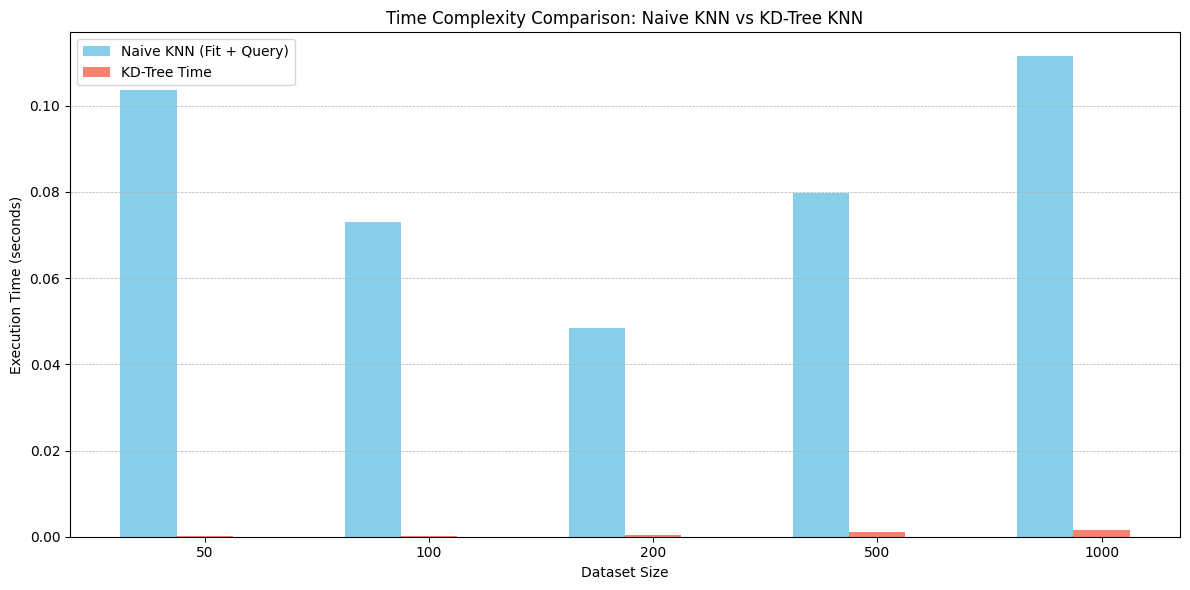

In [95]:
import time
import matplotlib.pyplot as plt
import numpy as np

# Dataset sizes for comparison
dataset_sizes = [50, 100, 200, 500, 1000]
naive_times = []
kd_query_times = []  # Time for querying only
kd_build_times = []  # Time for tree building

for size in dataset_sizes:
    # Select a subset of the training data
    X_train_sample = X_train_selected[:size]
    y_train_sample = y_train[:size]

    # Measure Naive KNN time
    knn_naive = KNNClassifier_Naive(k=10)
    start_naive = time.time()
    knn_naive.fit(X_train_sample, y_train_sample)  # Fit
    knn_naive.predict(X_test_selected)        # Predict on a fixed subset of test data
    end_naive = time.time()
    naive_times.append(end_naive - start_naive)

    # Measure KD-Tree build and query time
    knn_kd_tree = KNNWithCustomKDTree(k=5, leaf_size=40, metric="manhattan")
    start_build = time.time()
    knn_kd_tree.fit(X_train_sample, y_train_sample)
    end_build = time.time()
    kd_build_times.append(end_build - start_build)

# Plot time comparison
plt.figure(figsize=(12, 6))
bar_width = 0.25
positions = np.arange(len(dataset_sizes))

# Naive KNN
plt.bar(positions, naive_times, bar_width, label="Naive KNN (Fit + Query)", color="skyblue")

# KD-Tree
plt.bar(positions + bar_width, kd_build_times, bar_width, label="KD-Tree Time", color="salmon")

# Add labels and legend
plt.xlabel("Dataset Size")
plt.ylabel("Execution Time (seconds)")
plt.title("Time Complexity Comparison: Naive KNN vs KD-Tree KNN")
plt.xticks(positions + bar_width, dataset_sizes)
plt.legend()
plt.grid(axis="y", linestyle="--", linewidth=0.5)
plt.tight_layout()

# Display the plot
plt.show()


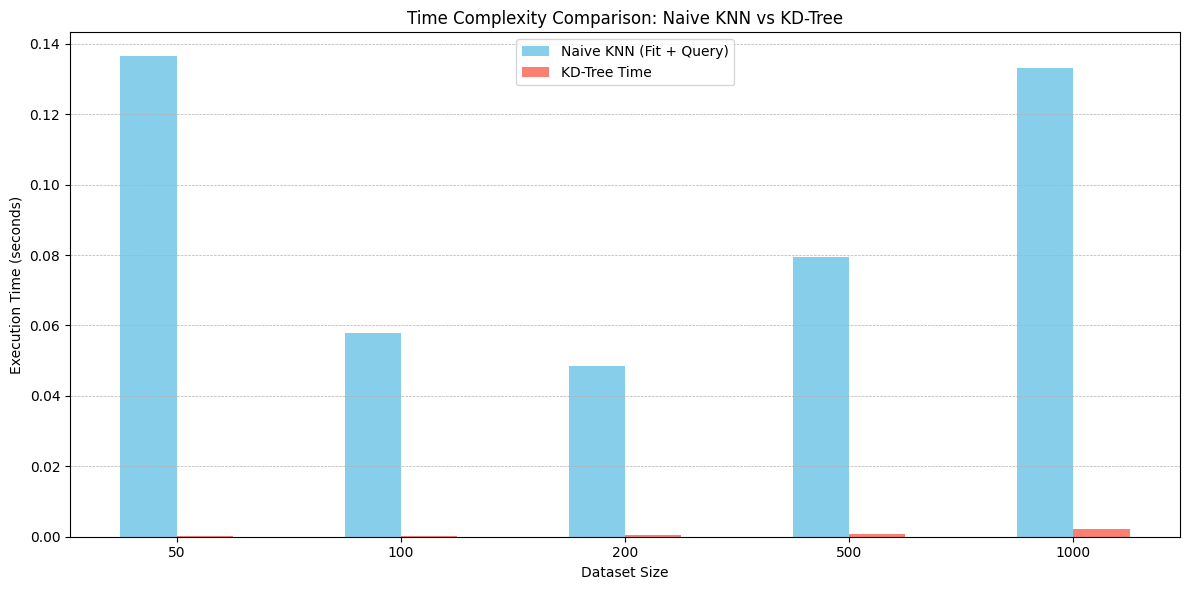

In [98]:
import time
import matplotlib.pyplot as plt
import numpy as np

# Dataset sizes for comparison
dataset_sizes = [50, 100, 200, 500, 1000]
naive_times = []
kd_build_times = []  # Time for tree building

for size in dataset_sizes:
    # Select a subset of the training data (at least 20 samples)
    subset_size = max(size, 10)
    X_train_sample = X_train_selected[:subset_size]
    y_train_sample = y_train[:subset_size]

    # Measure Naive KNN time
    knn_naive = KNNClassifier_Naive(k=10)
    start_naive = time.time()
    knn_naive.fit(X_train_sample, y_train_sample)
    knn_naive.predict(X_test_selected)
    end_naive = time.time()
    naive_times.append(end_naive - start_naive)

    # Measure KD-Tree build time
    knn_kd_tree = KNNWithCustomKDTree(k=5, leaf_size=40, metric="manhattan")
    start_build = time.time()
    knn_kd_tree.fit(X_train_sample, y_train_sample)
    end_build = time.time()
    kd_build_times.append(end_build - start_build)

# Plot time comparison
plt.figure(figsize=(12, 6))
bar_width = 0.25
positions = np.arange(len(dataset_sizes))

# Naive KNN
plt.bar(positions, naive_times, bar_width, label="Naive KNN (Fit + Query)", color="skyblue")

# KD-Tree
plt.bar(positions + bar_width, kd_build_times, bar_width, label="KD-Tree Time", color="salmon")

# Add labels and legend
plt.xlabel("Dataset Size")
plt.ylabel("Execution Time (seconds)")
plt.title("Time Complexity Comparison: Naive KNN vs KD-Tree")
plt.xticks(positions + bar_width / 2, dataset_sizes)
plt.legend()
plt.grid(axis="y", linestyle="--", linewidth=0.5)
plt.tight_layout()

# Display the plot
plt.show()
